In [130]:
#Importation des libreries nécéssaires
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

In [131]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
path='/content/gdrive/MyDrive/FOR NEXA/un analyseur de spectre/1.wav'

In [133]:
#Chargement du fichier audio
fs , s=wavfile.read(path)
t=np.linspace(0, len(s)/fs, len(s))
if s.ndim > 1 :
  s=s[: , 0]

Text(0.5, 1.0, 'Signal audio original')

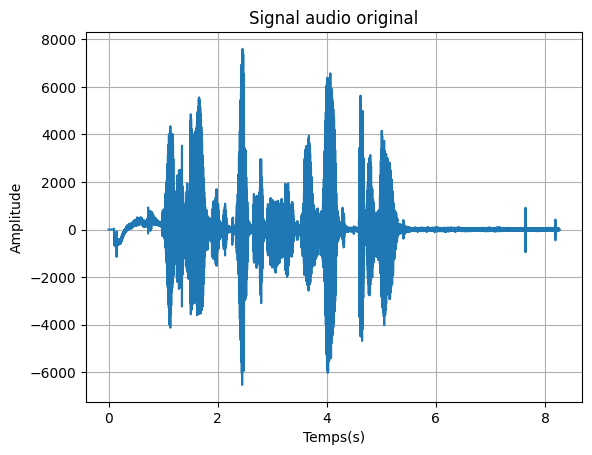

In [134]:
#Affichage du signal original
plt.figure()
plt.plot(t, s)
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.title('Signal audio original')

In [135]:
#Normalisation du signal
s_normalisé=s/np.max(np.abs(s))

In [136]:
#Ecouter le signal original
Audio(s_normalisé , rate=fs)

In [137]:
#Transformé de fourier de signal original
freq=np.fft.fftfreq(len(s), d=t[1]-t[0])
fft=np.fft.fft(s_normalisé)

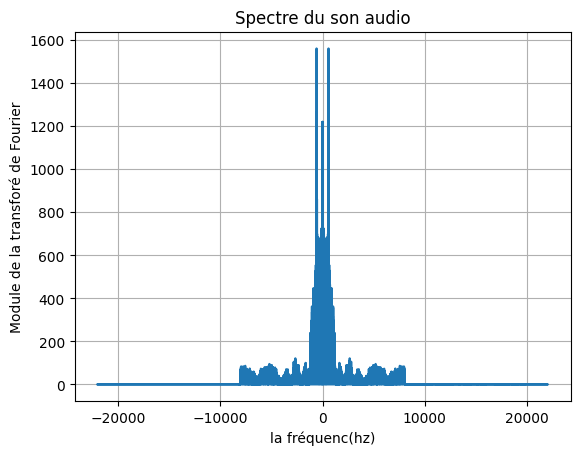

In [138]:
#Affichage du spectre du signal audio
plt.figure()
plt.plot(freq , np.abs(fft))
plt.xlabel('la fréquenc(hz)')
plt.ylabel('Module de la transforé de Fourier')
plt.title('Spectre du son audio')
plt.grid(True)

In [139]:
#Application d'un filtre passe_bas
fft_filtre=fft.copy()
fft_filtre[np.abs(freq)>1000]=0.05
fft_filtre[np.abs(freq)<1000]=fft_filtre[np.abs(freq)<1000]*1.2

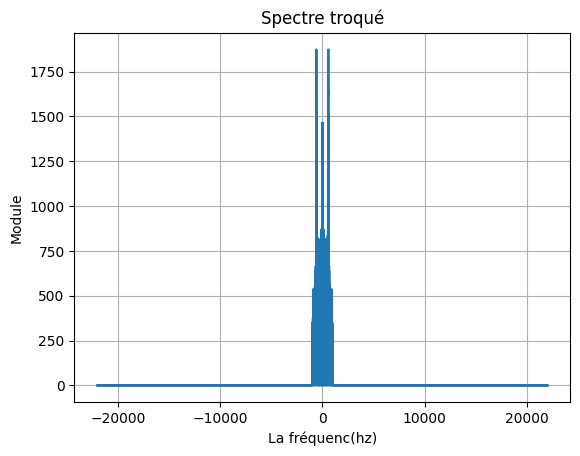

In [140]:
#Affichage du spectre filtré
plt.plot(freq, np.abs(fft_filtre))
plt.xlabel('La fréquenc(hz)')
plt.ylabel('Module')
plt.title('Spectre troqué')
plt.grid(True)

In [141]:
#Ecouter le signal filtré
s_filtre=np.fft.ifft(fft_filtre)
Audio(s_filtre ,  rate=fs)

/usr/local/lib/python3.11/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [142]:
#Implemetation du filtre moynneeur glissant
def M(n):
  return np.ones(n)/n

In [143]:
#Application du filtre sur notre signal
n=15
s_mf=np.convolve(s_normalisé, M(n), mode='same')
Audio(s_mf,  rate=fs)

In [144]:
#Implementation du filtre gaussien glissant
def gau(size, sigma):
  x=np.linspace(-size//2 , size//2, size )
  kernel=np.exp(-x**2/(2*sigma**2))
  kernel=kernel/np.max(np.abs(kernel))
  return kernel

In [145]:
#Application du filtre au signal
size=11
sigma=2
s_gf=np.convolve(s_normalisé, gau(size, sigma), mode='same')
Audio(s_gf,  rate=fs)

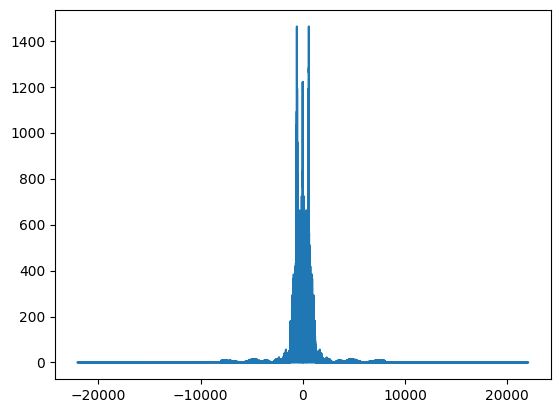

In [146]:
fft_mf=np.fft.fft(s_mf)
fft_gf=np.abs(np.fft.fft(s_gf))

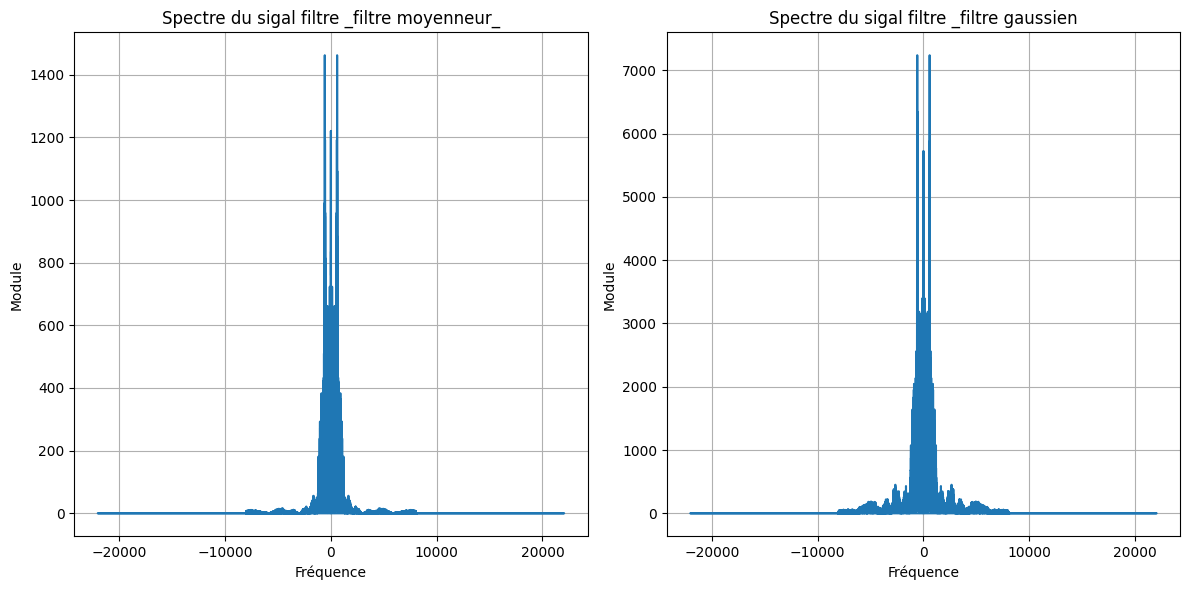

In [149]:
#Affichage des spectres des signaux filtrés
plt.figure(figsize=(12 , 6))
plt.subplot(1 , 2 , 1)
plt.plot(freq, np.abs(np.fft.fft(s_mf)))
plt.xlabel('Fréquence')
plt.ylabel('Module')
plt.title('Spectre du sigal filtre _filtre moyenneur_')
plt.grid(True)
plt.subplot(1 , 2 , 2)
plt.plot(freq, np.abs(np.fft.fft(s_gf)) )
plt.xlabel('Fréquence')
plt.ylabel('Module')
plt.title('Spectre du sigal filtre _filtre gaussien')
plt.grid(True)
plt.tight_layout()